Post-processing script

In [31]:
import os
import sys
import re
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['figure.figsize'] = [5, 5]

General post processing idea

Get the time data first. First, open up every castep file 

In [32]:
#cell_file_directory holds the name of the directory for the cell files
cell_file_directory = '/home/riesel/Tsach/tsach276/more_organized/LaRu4Bi12_cell_files/'

Some useful functions 

In [33]:
def write_to_log(text):
    os.system("echo '{}' >> /home/riesel/Tsach/tsach276/more_organized/log_file.txt".format(text))
    
def move_folders(screen_path, cutoff_energy, cell_file_directory): 
    #create a new subdirectory for each cutoff energy 
    new_directory_name = str(screen_path + "LaRu4Bi12" + "_" + cutoff_energy)
    #copy the cell files over into each cutoff energy directory 
    cell_file_directory_folders = os.listdir(new_directory_name)
    for folder in cell_file_directory_folders:
        #go into the folder and ...
        folder = folder + "/"
    return(new_directory_name, cell_file_directory_folders)

def read(filename): 
    file = open(filename, "r")
    file_read = file.read()
    file.close()
    return file_read

def readlines(filename):
    file = open(filename,"r")
    file_lines = file.readlines()
    file.close()
    return file_lines
        

In [38]:
# initialize list of lists
data = []
#cutoff_energies as an array (hopefully can update this to have input capabilities)
cutoff_energies = ['500', '600', '700', '800', '900', '1000', '1200', '1600', '2000', '2500', '3000']
#for every cutoff energy in the array of cutoff energies 
for cutoff_energy in cutoff_energies:
    new_directory_name, cell_file_directory_folders = move_folders("/home/riesel/Tsach/tsach276/more_organized/cut_off_energy_screen/", cutoff_energy, cell_file_directory)
    #for every subfolder for every cutoff energy
    for folder in cell_file_directory_folders:
        file_names = os.listdir(new_directory_name+"/"+folder)

        #for every file in that folder
        for file_name in file_names:
            #if that file is a castep file
            if file_name[-6:] == "castep":
                sublist = []
                sublist.append(float(cutoff_energy))
                sublist.append(file_name[:-7])
                #if the n extra bands error is in the castep file
                castep_file_lines = readlines(new_directory_name+"/"+folder+"/"+ file_name)
                for line in castep_file_lines:
                    if "Total time" in line:
                        sublist.append(float(line[-9:-3]))
                    elif "total energy of" in line:
                        sublist.append(float(line[-14:-3]))
                        
                data.append(sublist)


# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Cutoff Energy', 'Name', 'Free Energy', 'Free Energy Duplicate', 'Time'])


aggregate_data = []
for cutoff_energy in cutoff_energies:
    sublist = []
    sublist = sublist.append(df[df["Cutoff Energy"]==float(cutoff_energy)]["Time"].mean()) 
    aggregate_data.append(sublist)
    
print(df)
print(aggregate_data)

FileNotFoundError: [Errno 2] No such file or directory: '/home/riesel/Tsach/tsach276/more_organized/cut_off_energy_screen/LaRu4Bi12_500'

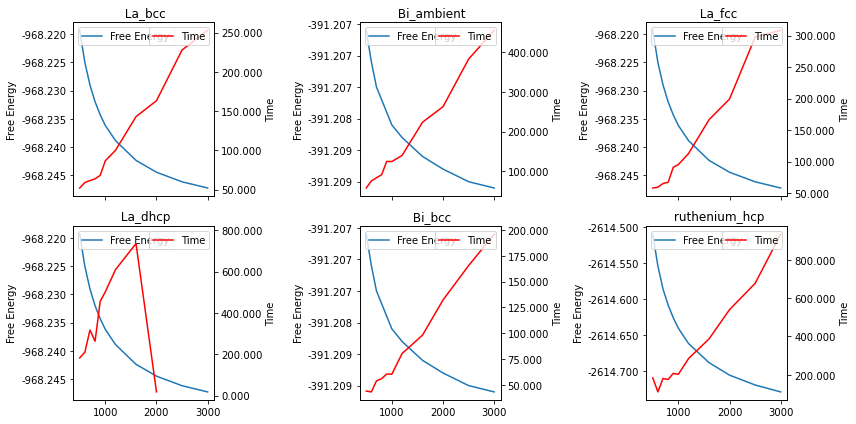

In [29]:
# Initialize a dictionary to store lines for each name
# Get unique names
names = df['Name'].unique()

# Calculate the number of rows and columns for subplots
num_plots = len(names)
num_rows = (num_plots + 2) // 3  # Adjusting for uneven number of plots
num_cols = min(num_plots, 3)

# Create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)

# Flatten the axs array if needed
if num_plots == 1:
    axs = [axs]

# Iterate over each subplot
for i, name in enumerate(names):
    # Calculate the row and column indices for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Filter DataFrame by name
    subset = df[df['Name'] == name]
    
    # Get x and y values for the name
    x = subset['Cutoff Energy']
    y = subset['Free Energy']
    time = subset['Time']
    
    # Plot the line for Free Energy
    axs[row_idx][col_idx].plot(x, y, label='Free Energy')
    axs[row_idx][col_idx].set_ylabel('Free Energy')
    
    # Create a secondary y-axis for Time
    axs_time = axs[row_idx][col_idx].twinx()
    axs_time.plot(x, time, color='red', label='Time')
    axs_time.set_ylabel('Time')
    
    # Customize the subplot
    axs[row_idx][col_idx].set_title(f' {name}')
    axs[row_idx][col_idx].legend(loc='upper left')
    axs_time.legend(loc='upper right')
    
    # Format the y-axis labels to three decimal places
    axs[row_idx][col_idx].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
    axs_time.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))


# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs[i // num_cols][i % num_cols])

# Customize the overall plot
plt.xlabel('Cutoff Energy')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
####    

In [30]:
df

,Cutoff Energy,Name,Free Energy,Free Energy Duplicate,Time
0,500.0,La_bcc,-968.2193,-968.2193,51.97
1,500.0,Bi_ambient,-391.2066,-391.2066,57.93
2,500.0,La_fcc,-968.2193,-968.2193,58.10
3,500.0,La_dhcp,-968.2193,-968.2193,182.09
4,500.0,Bi_bcc,-391.2066,-391.2066,44.10
...,...,...,...,...,...
61,3000.0,La_bcc,-968.2473,-968.2473,252.95
62,3000.0,Bi_ambient,-391.2091,-391.2091,455.03
63,3000.0,ruthenium_hcp,-2614.7287,-2614.7287,933.04
64,3000.0,Bi_bcc,-391.2091,-391.2091,195.89


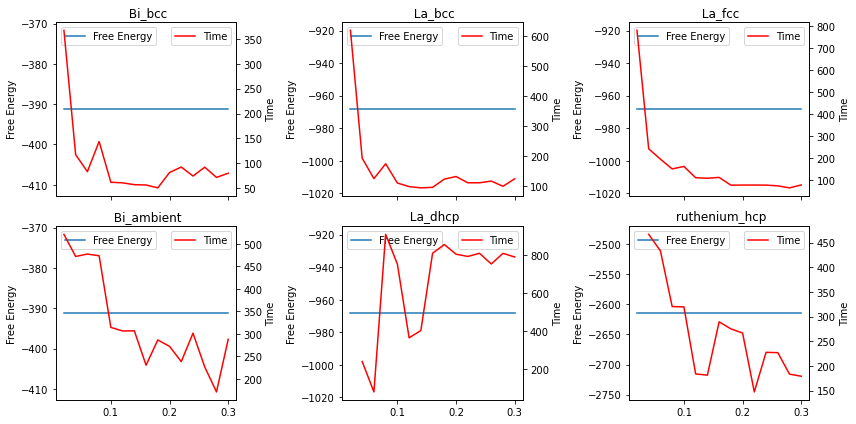

In [18]:
# initialize list of lists
data = []
#cutoff_energies as an array (hopefully can update this to have input capabilities)
kpoint_spacings = ['0.02', '0.04', '0.06', '0.08', '0.1', '0.12', '0.14', '0.16', '0.18', '0.20', '0.22', '0.24', '0.26', '0.28', '0.3']
#for every cutoff energy in the array of cutoff energies 
for kpoint_spacing in kpoint_spacings:
    new_directory_name, cell_file_directory_folders = move_folders("/home/riesel/Tsach/tsach276/more_organized/kpoints_screen/", kpoint_spacing, cell_file_directory)
    #for every subfolder for every cutoff energy
    for folder in cell_file_directory_folders:
        file_names = os.listdir(new_directory_name+"/"+folder)

        #for every file in that folder
        for file_name in file_names:
            #if that file is a castep file
            if file_name[-6:] == "castep":
                sublist = []
                sublist.append(float(kpoint_spacing))
                sublist.append(file_name[:-7])
                #if the n extra bands error is in the castep file
                castep_file_lines = readlines(new_directory_name+"/"+folder+"/"+ file_name)
                for line in castep_file_lines:
                    if "Total time" in line:
                        sublist.append(float(line[-9:-3]))
                    elif "total energy of" in line:
                        sublist.append(float(line[-14:-3]))
                        
                data.append(sublist)


# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Kpoint spacing', 'Name', 'Free Energy', 'Free Energy Duplicate', 'Time'])
aggregate_data = []
for kpoint_spacing in kpoint_spacings:
    sublist = []
    sublist = sublist.append(df[df["Kpoint spacing"]==float(kpoint_spacing)]["Time"].mean()) 
    aggregate_data.append(sublist)

#### Graph code made w/ ChatGPT     

# Get unique names
names = df['Name'].unique()

# Calculate the number of rows and columns for subplots
num_plots = len(names)
num_rows = (num_plots + 2) // 3  # Adjusting for uneven number of plots
num_cols = min(num_plots, 3)

# Create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)

# Flatten the axs array if needed
if num_plots == 1:
    axs = [axs]

# Iterate over each subplot
for i, name in enumerate(names):
    # Calculate the row and column indices for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Filter DataFrame by name
    subset = df[df['Name'] == name]
    
    # Get x and y values for the name
    x = subset['Kpoint spacing']
    y = subset['Free Energy']
    time = subset['Time']
    
    # Plot the line for Free Energy
    axs[row_idx][col_idx].plot(x, y, label='Free Energy')
    axs[row_idx][col_idx].set_ylabel('Free Energy')
    
    # Create a secondary y-axis for Time
    axs_time = axs[row_idx][col_idx].twinx()
    axs_time.plot(x, time, color='red', label='Time')
    axs_time.set_ylabel('Time')
    
    # Customize the subplot
    axs[row_idx][col_idx].set_title(f' {name}')
    axs[row_idx][col_idx].legend(loc='upper left')
    axs_time.legend(loc='upper right')

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs[i // num_cols][i % num_cols])

# Customize the overall plot
plt.xlabel('Kpoint spacing')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
####   

In [16]:
df

,Kpoint spacing,Name,Free Energy,Free Energy Duplicate,Time
0,0.02,Bi_bcc,-391.2086,-391.2086,367.06
1,0.02,La_bcc,-968.2424,-968.2424,620.03
2,0.02,La_fcc,-968.2424,-968.2424,779.63
3,0.02,Bi_ambient,-391.2086,-391.2086,521.25
4,0.02,La_dhcp,-968.2424,NaN,NaN
...,...,...,...,...,...
85,0.30,Bi_ambient,-391.2086,-391.2086,288.16
86,0.30,La_fcc,-968.2424,-968.2424,77.62
87,0.30,Bi_bcc,-391.2086,-391.2086,80.23
88,0.30,La_bcc,-968.2424,-968.2424,123.67
